For what ticker do you want historical data for? nvda


You have selected the ticker: NVDA.


For how long would you like to compute the volatility for? 1y


This program will now compute the volatility of NVDA for a period of 1y which is approximately 365 days.


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-10-18  138.669998  138.899994  137.279999  138.000000  138.000000   
2024-10-17  139.339996  140.889999  136.869995  136.929993  136.929993   
2024-10-16  133.979996  136.619995  131.580002  135.720001  135.720001   
2024-10-15  137.869995  138.570007  128.740005  131.600006  131.600006   
2024-10-14  136.470001  139.600006  136.300003  138.070007  138.070007   

               Volume  Log Returns  
Date                                
2024-10-18  175800600          NaN  
2024-10-17  306435900    -0.007784  
2024-10-16  264879700    -0.008876  
2024-10-15  377831000    -0.030827  
2024-10-14  232347700     0.047994  

Below is a line graph charting the adjusted close prices of NVDA for a period of 1y


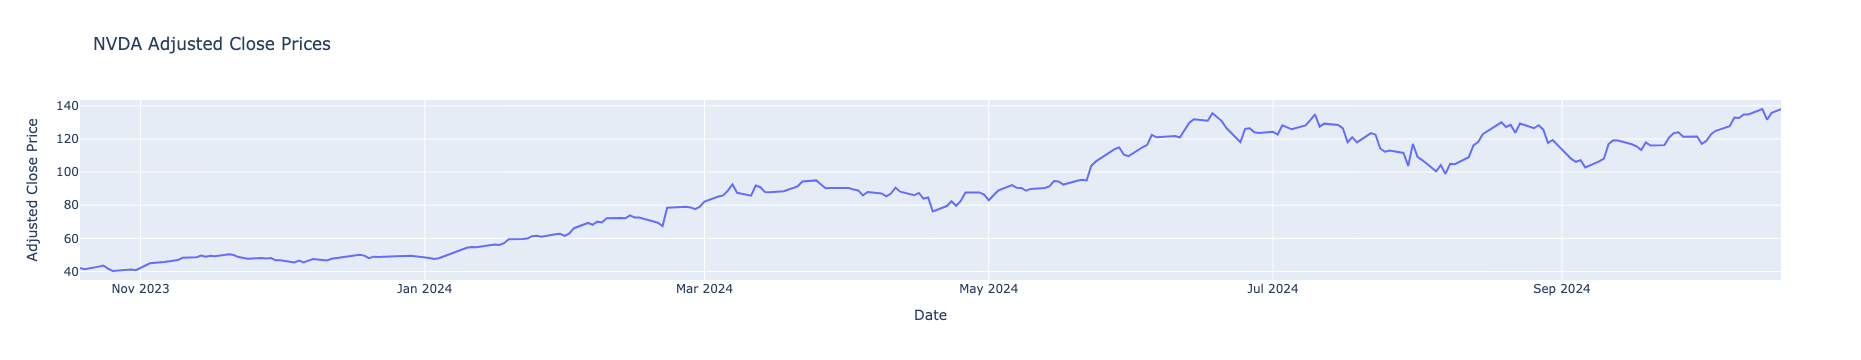

The mean of the logarithmic returns of NVDA is -0.004731014527828166.
The variance of NVDA is 0.0010460749372009843.
The standard deviation of NVDA is 0.03234308175175928.
The daily volatility of NVDA is 3.2343081751759284.
The annualised volatility of NVDA for the period of 1y is 61.79137092494059.
The current price (latest close price) of NVDA is 138.0



What is the strike price of the option that you are intending to purchase? 105
How many days until the option expires? 303


The current risk-free rate (10-Year Treasury Yield) is: 4.07%



Is the option that you are interested in a call, a put option or both {Keys: call, put or both}? both



The theoretical price for the call option of NVDA at the strike price of 105.0 is 48.50866231366611

The theoretical price for the put option of NVDA at the strike price of 105.0 is 12.01780509468572

The closest expiration date found is 2025-08-15 00:00:00 which will expire in 299 days

Call Options:
         contractSymbol             lastTradeDate  strike  lastPrice   bid  \
11  NVDA250815C00105000 2024-10-18 19:46:34+00:00   105.0      45.95  45.7   

     ask    change  percentChange  volume  openInterest  impliedVolatility  \
11  46.0 -1.630001      -3.425811       6          1549           0.603947   

    inTheMoney contractSize currency  Implied Volatility as %  
11        True      REGULAR      USD                60.394683  

Put Options:
         contractSymbol             lastTradeDate  strike  lastPrice   bid  \
11  NVDA250815P00105000 2024-10-18 19:30:29+00:00   105.0        8.7  8.65   

    ask  change  percentChange  volume  openInterest  impliedVolatility  \
11  8.8 

In [344]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
from scipy.stats import norm
from datetime import datetime

ticker_symbol = input("For what ticker do you want historical data for?")
print("You have selected the ticker: " + ticker_symbol.upper() + ".")
ticker = yf.Ticker(ticker_symbol)

#converting period into number of days so that we can compute the yearly volatility


period = input("For how long would you like to compute the volatility for?")

def convert_period_into_days(period):
    #splitting the number into days
    number = int(period[:-1]) #gets the numeric part
    unit = period[-1]
    #conversion logic
    if unit == 'd': #days
        return number
    elif unit == 'w': # weeks
        return number * 7
    elif unit == 'mo': #months
        return number * 30
    elif unit == 'y': # years 
        return number * 365
    else:
        raise ValueError("Invalid Period Format. Supported units: d,w,mo,y.")

number = convert_period_into_days(period) #converts the period into days 

print("This program will now compute the volatility of " + ticker_symbol.upper() + " for a period of " + str(period) + " which is approximately " + str(number) + " days.")


historical_data = yf.download(ticker_symbol, period = period) #downloads the historical data for 1-year
historical_data = historical_data.sort_values("Date", ascending = False) #sorts the data in a descending order
historical_data["Log Returns"] = np.log(historical_data['Adj Close']/historical_data['Adj Close'].shift(1)) #calculates the log returns of the stock based on the adjusted close price

print(historical_data.head()) #prints the first couple entries of the dataFrame
print("\nBelow is a line graph charting the adjusted close prices of " + ticker_symbol.upper() + " for a period of " + period)

fig1 = px.line(historical_data, x=historical_data.index, y="Adj Close", 
               labels={"x": "Date", "Adj Close": "Adjusted Close Price"}, 
               title=f"{ticker_symbol.upper()} Adjusted Close Prices")
fig1.show()

#calculating mean of the logarithmic returns
mean_log_returns = historical_data["Log Returns"].mean()

print("The mean of the logarithmic returns of " + ticker_symbol.upper() + " is " + str(mean_log_returns) + ".")

#this will now calculate the deviations from mean of the stock returns

historical_data['Deviation from Mean'] = (historical_data['Log Returns']-mean_log_returns)**2
historical_data.head()

#calculating the variance of the stock based on the deviations
variance = historical_data["Deviation from Mean"].mean()

print("The variance of " + ticker_symbol.upper() + " is " + str(variance) + ".")

std_dev = np.sqrt(variance) #calculates the standard deviation based on the square root of the variance
print ("The standard deviation of " + ticker_symbol.upper() + " is " + str(std_dev) + ".")

daily_volatility = std_dev * 100 #multipliles by 100 to get daily volatility

print("The daily volatility of " + ticker_symbol.upper() + " is " + str(daily_volatility) + ".")

annualised_volatility = daily_volatility * np.sqrt(number) #calculates the one year volatility by multiplying daily volatility by the square root of 365 days 

print("The annualised volatility of " + ticker_symbol.upper() + " for the period of " + str(period) + " is " + str(annualised_volatility) + ".")

#now to calculate the theoretical prices of the option chain based on the Black-Scholes Model

current_price = ticker.history(period = "1d")['Close'].iloc[-1]

print("The current price (latest close price) of " + ticker_symbol.upper() + " is " + str(current_price))

strike_price = float(input("\nWhat is the strike price of the option that you are intending to purchase?"))

days_to_expiry = input("How many days until the option expires?")
calc_days_to_expiry_as_years = (int(days_to_expiry))/365 #converts the days to expiry as year

ten_year_treasury_yield = "^TNX" #gets the yield on the 10-year treasury as the risk free rate

treasury_data = yf.Ticker(ten_year_treasury_yield)

ten_year_rate = treasury_data.history(period="1d")['Close'].iloc[-1] #latest closing price
print(f"The current risk-free rate (10-Year Treasury Yield) is: {ten_year_rate:.2f}%")
risk_free_rate = ten_year_rate / 100

call_or_put = input("\nIs the option that you are interested in a call, a put option or both {Keys: call, put or both}?")


#calculating the d1 and d2
d1 = (np.log(current_price/strike_price)+(risk_free_rate +0.5 * (annualised_volatility/100)**2)*calc_days_to_expiry_as_years)/((annualised_volatility/100) * np.sqrt(calc_days_to_expiry_as_years))
d2 = d1 - (annualised_volatility/100) * np.sqrt(calc_days_to_expiry_as_years) #must divide annualised volatility / 100 to convert into decimal

if call_or_put.lower() == "both":
    call_option_price = (current_price * norm.cdf(d1)) - (strike_price * np.exp(-risk_free_rate * calc_days_to_expiry_as_years) * norm.cdf(d2))
    print("\nThe theoretical price for the call option of " + ticker_symbol.upper() + " at the strike price of " + str(strike_price) + " is " + str(call_option_price))
    put_option_price = (strike_price * np.exp(-risk_free_rate * calc_days_to_expiry_as_years) * norm.cdf(-d2)) - (current_price* norm.cdf(-d1))
    print("\nThe theoretical price for the put option of " + ticker_symbol.upper() + " at the strike price of " + str(strike_price) + " is " + str(put_option_price))
elif call_or_put.lower() == "call":
    call_option_price = (current_price * norm.cdf(d1)) - (strike_price * np.exp(-risk_free_rate * calc_days_to_expiry_as_years) * norm.cdf(d2))
    print("\nThe theoretical price for the call option of " + ticker_symbol.upper() + " at the strike price of " + str(strike_price) + " is " + str(call_option_price))

elif call_or_put.lower() == "put":
    put_option_price = (strike_price * np.exp(-risk_free_rate * calc_days_to_expiry_as_years) * norm.cdf(-d2)) - (current_price* norm.cdf(-d1))
    print("\nThe theoretical price for the put option of " + ticker_symbol.upper() + " at the strike price of " + str(strike_price) + " is " + str(put_option_price))
else:
    raise ValueError ("\nOption type must either be a 'call' or a 'put")

#now to compare the theoretical price to the strike price to examine whether the option is undervalued or overvalued

options_dates = ticker.options #gets the expiration dates for all the available options for the ticker
#converting expiration date strings into datetime objects and calculates days to expiration

current_date = datetime.now()

min_days_diff = float('inf') #large number to find the min
closest_expiration_date = None

for date_str in options_dates:
    expiration_date = datetime.strptime(date_str, '%Y-%m-%d')
    days_to_expiration = (expiration_date - current_date).days


    #checking if the expiration date is close to the input given by the user
    if abs(days_to_expiration - int(days_to_expiry)) < min_days_diff:
        min_days_diff = abs(days_to_expiration - int(days_to_expiry))
        closest_expiration_date = expiration_date


if closest_expiration_date is not None:
    #calculating the days until the closeset expiration date
    days_until_closest = (closest_expiration_date - current_date).days

    #comparing the calculated days until closest expiration with user input
    if days_until_closest == int(days_to_expiry):
        print("\nWe have found the option that you wish to analyse")
    else:
        print(f"\nThe closest expiration date found is {closest_expiration_date} which will expire in {days_until_closest} days")
else:
    print("No available expiration dates found")


option_chain = ticker.option_chain(closest_expiration_date.strftime('%Y-%m-%d')) #gets the option chain for the closest expiration date

call_options = option_chain.calls
put_options = option_chain.puts

call_options['Implied Volatility as %'] = (call_options['impliedVolatility'] * 100)
put_options['Implied Volatility as %'] = (put_options['impliedVolatility'] * 100)

call_options = option_chain.calls[option_chain.calls['strike'] == strike_price]
put_options = option_chain.puts[option_chain.puts['strike'] == strike_price]

#displaying option chain information

if call_or_put.lower() == "both":
    if not call_options.empty:
        print("\nCall Options:")
        print(call_options)
    else:
        print(f"No call options found for strike price {strike_price}.")
    
    if not put_options.empty:
        print("\nPut Options:")
        print(put_options)
    else:
        print(f"No put options found for strike price {strike_price}.")
        
elif call_or_put.lower() == "call":
    if not call_options.empty:
        print("\nCall Options:")
        print(call_options)
    else:
        print(f"No call options found for strike price {strike_price}.")
        
elif call_or_put.lower() == "put":
    if not put_options.empty:
        print("\nPut Options:")
        print(put_options)
    else:
        print(f"No put options found for strike price {strike_price}.")
        
else:
    print("No option chain found")


#option chain analysis through comparison between Black-Scholes Price and Theoretical Price

if call_or_put.lower() == 'both':
    if not call_options.empty:
        last_price_call = call_options['lastPrice'].iloc[0] #gets the last price of the first call option
        if last_price_call < call_option_price:
            print("\nThe theoretical price of the call option is more than the last quoted price which means that the call option might be undervalued.")
        elif last_price_call > call_option_price:
            print("\nThe theoretical price of the call option is less than the last quoted price which means that the call option might be overvalued.")
        elif last_price_call == call_option_price:
            print("\nThe theoretical price of the call option is equal to the last quoted price.")
        else:
            print("\nNo call options found for the specified strike price.")

    if not put_options.empty:
        last_price_put = put_options['lastPrice'].iloc[0] #gets the last price of the first call option
        if last_price_put < put_option_price:
            print("\nThe theoretical price of the put option is more than the last quoted price which means that the put option might be undervalued.")
        elif last_price_put > put_option_price:
            print("\nThe theoretical price of the put option is less than the last quoted price which means that the put option might be overvalued.")
        elif last_price_put == put_option_price:
            print("\nThe theoretical price of the put option is equal to the last quoted price.")
        else:
            print("\nNo put options found for the specified strike price.")

elif call_or_put.lower() == 'call':
      if not call_options.empty:
        last_price_call = call_options['lastPrice'].iloc[0] #gets the last price of the first call option
        if last_price_call < call_option_price:
            print("\nThe theoretical price of the call option is more than the last quoted price which means that the call option might be undervalued.")
        elif last_price_call > call_option_price:
            print("\nThe theoretical price of the call option is less than the last quoted price which means that the call option might be overvalued.")
        elif last_price_call == call_option_price:
            print("\nThe theoretical price of the call option is equal to the last quoted price.")
        else:
            print("\nNo call options found for the specified strike price.")

elif call_or_put.lower() == 'put':
     if not put_options.empty:
        last_price_put = put_options['lastPrice'].iloc[0] #gets the last price of the first call option
        if last_price_put < put_option_price:
            print("\nThe theoretical price of the put option is more than the last quoted price which means that the put option might be undervalued.")
        elif last_price_put > put_option_price:
            print("\nThe theoretical price of the put option is less than the last quoted price which means that the put option might be overvalued.")
        elif last_price_put == put_option_price:
            print("\nThe theoretical price of the put option is equal to the last quoted price.")
        else:
            print("\nNo put options found for the specified strike price.")

else:
    print("\nComparisons between the theoretical price of the options to the last quoted price cannot be calculated")
